# Drug Review Dataset (Druglib.com) Data Set 

Please visit the UCI Machine Learning Repository to download the data set: http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29
<br><br>
<b>Summary of Data Set:</b><br>
The dataset provides patient reviews on specific drugs along with related conditions. Furthermore, reviews are grouped into reports on the three aspects benefits, side effects and overall comment. Additionally, ratings are available concerning overall satisfaction as well as a 5 step side effect rating and a 5 step effectiveness rating.<br>
The UCI Repository contains additional information about the dataset.

<br><br>Citation:<br>
<i>Surya Kallumadi <br>
Kansas State University <br>
Manhattan, Kansas, USA <br>
surya '@' ksu.edu <br><br>

Felix Gräßer <br>
Institut für Biomedizinische Technik <br>
Technische Universität Dresden <br>
Dresden, Germany <br>
felix.graesser '@' tu-dresden.de</i>

# The Task
1. Exploratory data analysis - show how the various aspects of the data are related. For example, are drugs with high ratings also highly effective? 
2. Train a model that predicts the drug rating.
3. Explore the model results. For example, why might a drug be highly rated? What sort of side effects contribute to a low rating?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
import plotly.tools as tls
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import random
from wordcloud import WordCloud
from palettable.colorbrewer.sequential import Blues_9, YlGnBu_9, PuBuGn_9

C:\Users\14084\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial



In [3]:
train_data = pd.read_csv('D:\\Downloads\\drugLibTrain_raw.tsv', sep='\t')
print(len(train_data), "observations in train dataset")
train_data.head()

3107 observations in train dataset


Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  
0  monitor blood pressure , weight and asses for ...  
1  I Hate This Birth Control, I Would Not Suggest...  
2  I took 2 pills at the onset of my menstrual cr...  
3  I was given Prilosec prescription at a dose of...  
4                                          See above

In [4]:
train_data.describe()

Unnamed: 0       rating
count  3107.000000  3107.000000
mean   2080.607016     7.006115
std    1187.998828     2.937582
min       0.000000     1.000000
25%    1062.500000     5.000000
50%    2092.000000     8.000000
75%    3092.500000     9.000000
max    4161.000000    10.000000

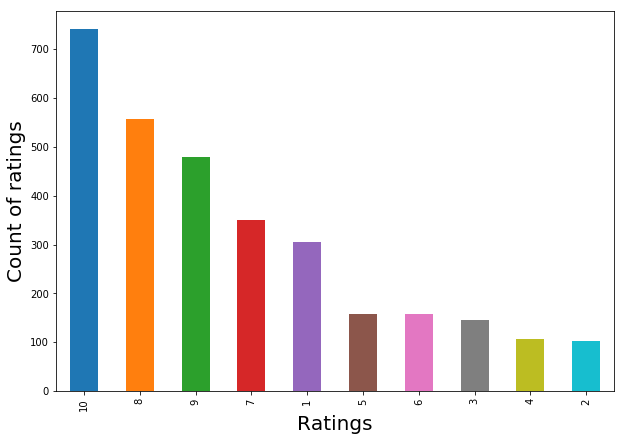

In [5]:
ratings = train_data['rating'].value_counts()
graph = plt.figure()
axes = graph.add_subplot(1,1,1)
axes.set_xlabel('Ratings', fontsize=20)
axes.set_ylabel('Count of ratings', fontsize=20)
ratings.plot(kind='bar',figsize=(10,7),fontsize=10)

C:\Users\14084\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



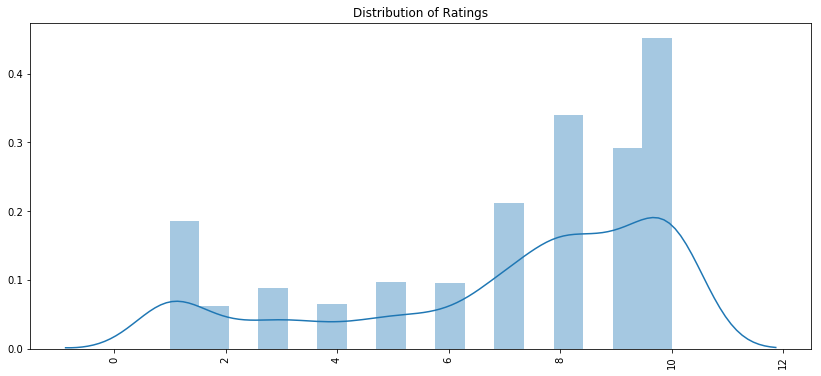

In [6]:
plt.figure(figsize=(14,6))
sns.distplot(train_data["rating"].dropna())
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of Ratings")
plt.show()

In [7]:
train_data['sideEffects'].value_counts()

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

In [8]:
train_data.groupby('effectiveness')['sideEffects'].value_counts()

effectiveness           sideEffects                  
Considerably Effective  Mild Side Effects                361
                        No Side Effects                  255
                        Moderate Side Effects            197
                        Severe Side Effects               85
                        Extremely Severe Side Effects     30
Highly Effective        No Side Effects                  529
                        Mild Side Effects                482
                        Moderate Side Effects            206
                        Severe Side Effects               86
                        Extremely Severe Side Effects     27
Ineffective             Severe Side Effects               76
                        Extremely Severe Side Effects     75
                        Moderate Side Effects             46
                        No Side Effects                   30
                        Mild Side Effects                 20
Marginally Effective    Severe 

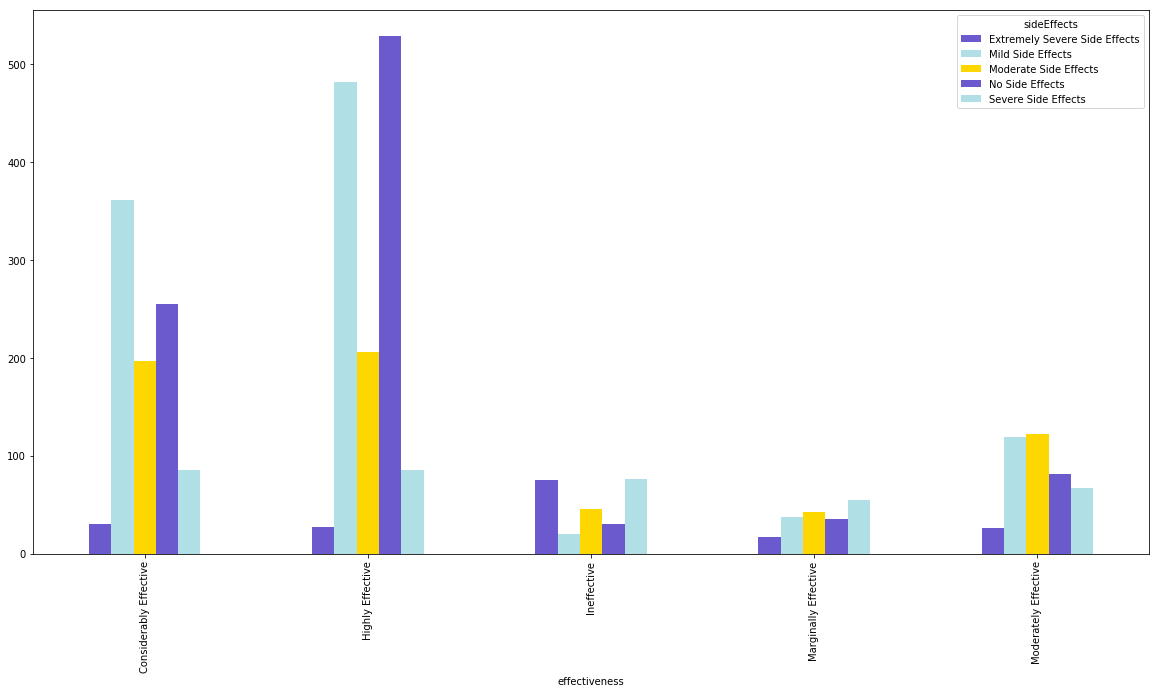

In [9]:
train_data.groupby(['effectiveness','sideEffects']).size().unstack().plot(kind='bar', figsize=(20,10), color = ['slateblue','powderblue','gold'])

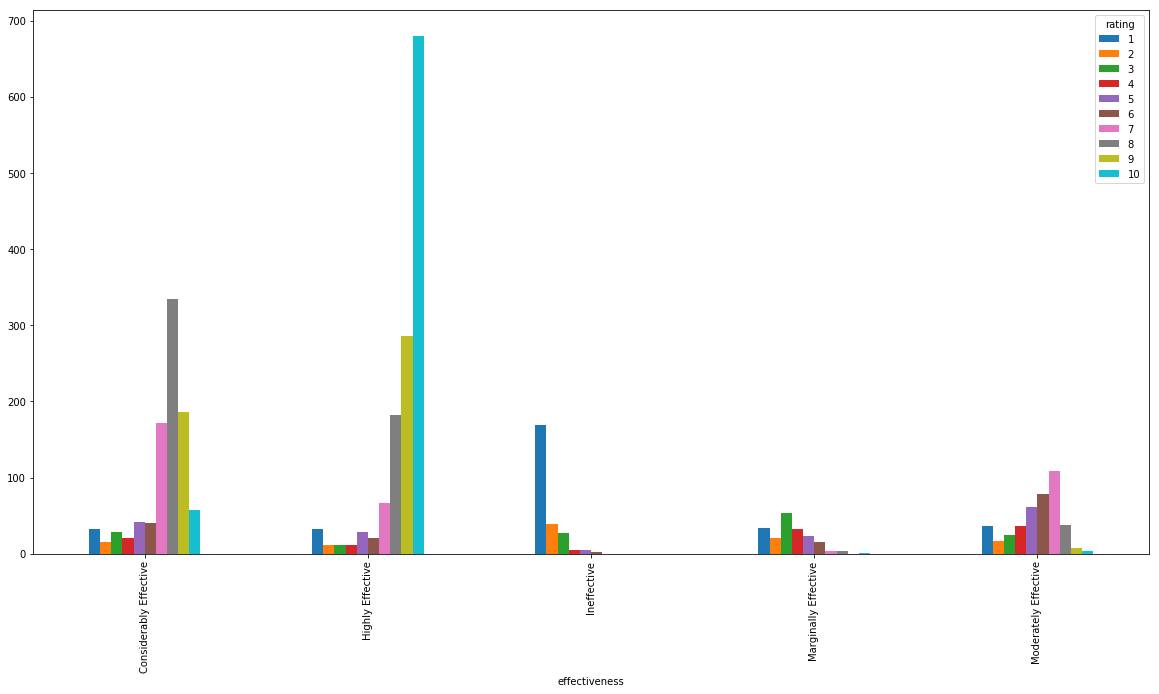

In [10]:
train_data.groupby(['effectiveness','rating']).size().unstack().plot(kind='bar', figsize=(20,10))

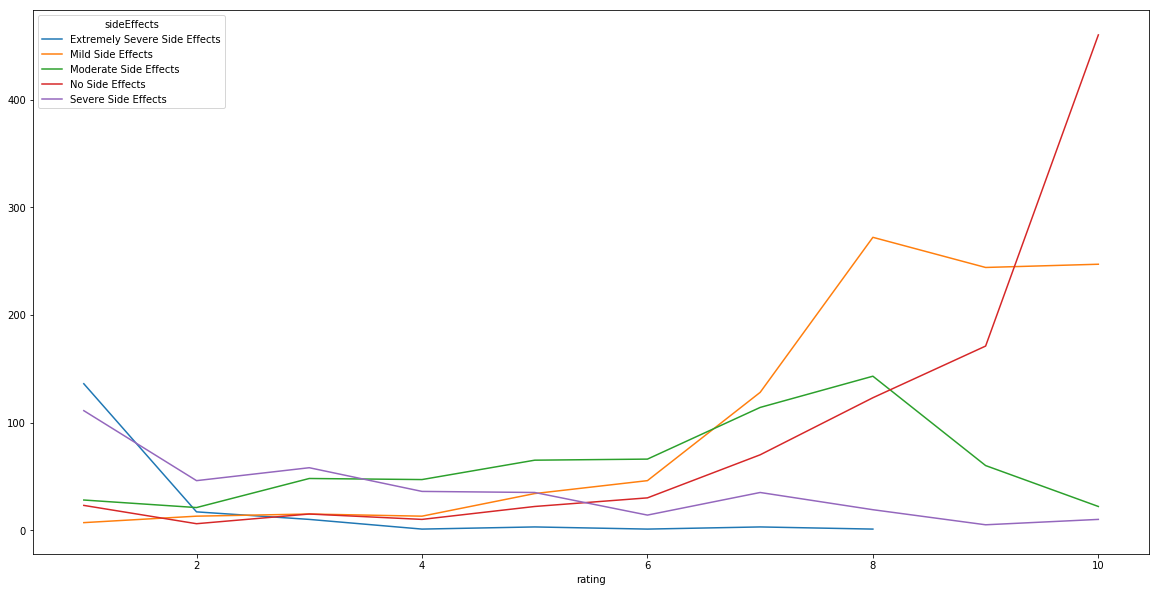

In [11]:
train_data.groupby(['rating','sideEffects']).size().unstack().plot(kind='line', figsize=(20,10))

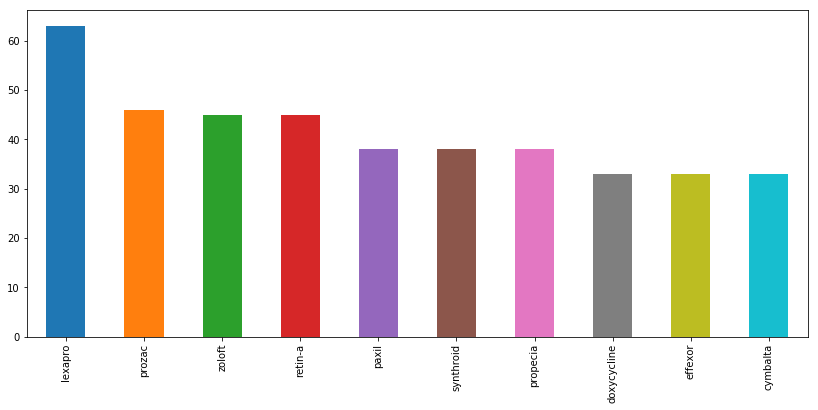

In [12]:
MostDrugs = train_data['urlDrugName'].value_counts().nlargest(10)
MostDrugs.plot(kind="bar", figsize = (14,6), fontsize = 10)

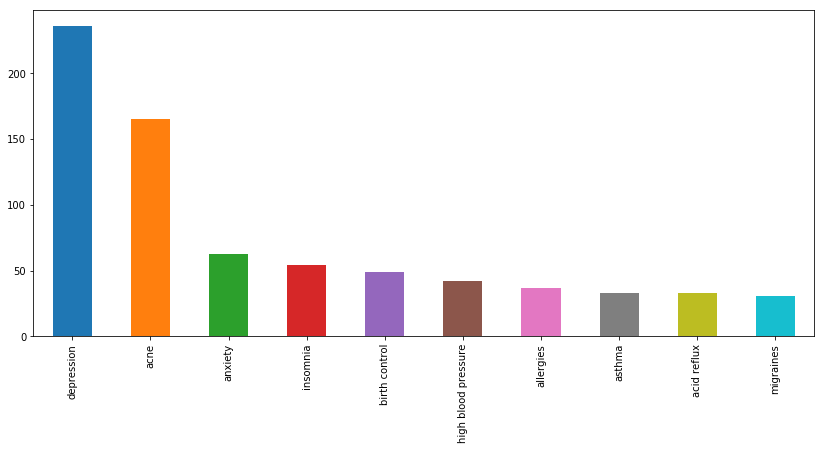

In [13]:
commonCdf = train_data['condition'].value_counts().nlargest(10)
commonCdf.plot(kind="bar", figsize = (14,6), fontsize = 10)

In [14]:
Drugs_for_Depression_with_high_rating = train_data[train_data['condition'] == 'depression']
drugsfordepression = pd.DataFrame(Drugs_for_Depression_with_high_rating.groupby('urlDrugName')['rating'].mean().nlargest(5)).reset_index()
fig = px.bar(drugsfordepression, y="urlDrugName", x="rating",orientation='h', title = "Drugs for Depression with high rating",color=  "rating", color_continuous_scale= px.colors.qualitative.T10).update_yaxes(categoryorder="total ascending")
fig.show()

In [15]:
Drugs_for_acne_with_high_rating = train_data[train_data['condition'] == 'acne']
drugsforacne = pd.DataFrame(Drugs_for_acne_with_high_rating.groupby('urlDrugName')['rating'].mean().nlargest(5)).reset_index()
fig = px.bar(drugsforacne, y="urlDrugName", x="rating",orientation='h', title = "Drugs for Acne with high rating",color=  "rating", color_continuous_scale= px.colors.qualitative.T10).update_yaxes(categoryorder="total ascending")
fig.show()

In [16]:
Drugs_for_anxiety_with_high_rating = train_data[train_data['condition'] == 'anxiety']
drugsforanxiety = pd.DataFrame(Drugs_for_anxiety_with_high_rating.groupby('urlDrugName')['rating'].mean().nlargest(5)).reset_index()
fig = px.bar(drugsforanxiety, y="urlDrugName", x="rating",orientation='h', title = "Drugs for anxiety with high rating",color=  "rating", color_continuous_scale= px.colors.qualitative.T10).update_yaxes(categoryorder="total ascending")
fig.show()

In [17]:
Drugs_for_birthcontrol_with_high_rating = train_data[train_data['condition'] == 'birth control']
drugsforbirthcontrol = pd.DataFrame(Drugs_for_birthcontrol_with_high_rating.groupby('urlDrugName')['rating'].mean().nlargest(5)).reset_index()
fig = px.bar(drugsforbirthcontrol, y="urlDrugName", x="rating",orientation='h', title = "Drugs for anxiety with high rating",color=  "rating", color_continuous_scale= px.colors.qualitative.T10).update_yaxes(categoryorder="total ascending")
fig.show()

Text(0.5,1,'Top10 number of drugs per condition.')

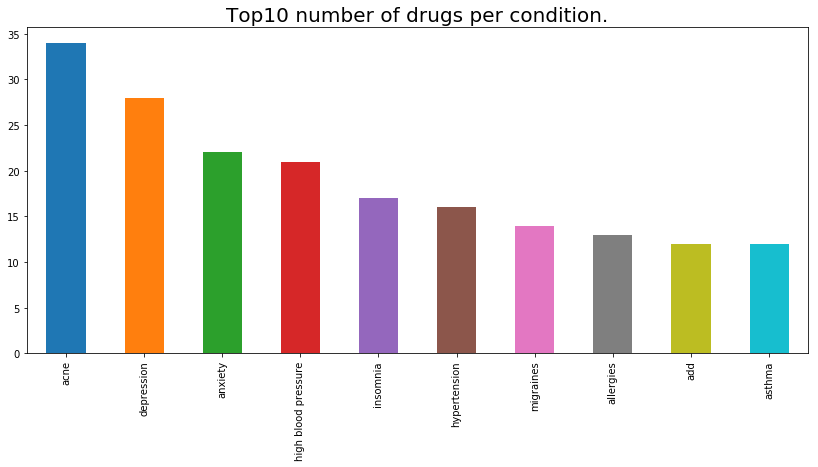

In [18]:
condition_dn = train_data.groupby(['condition'])['urlDrugName'].nunique().sort_values(ascending=False)
condition_dn[0:10].plot(kind="bar", figsize = (14,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top10 number of drugs per condition.", fontsize = 20)

In [19]:
train_data['Review of benefits']=train_data['benefitsReview'].apply(lambda x : x.split(',') if type(x)==str else [''])
train_data['Review of side effects']=train_data['sideEffectsReview'].apply(lambda x : x.split(',') if type(x)==str else [''])
train_data['Review of comments']=train_data['commentsReview'].apply(lambda x : x.split(',') if type(x)==str else [''])

In [20]:
def bluecolor(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Blues_9.colors[random.randint(2,8)])

def purplebluecolor(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(PuBuGn_9.colors[random.randint(2,8)])

def yellowgreencolor(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(YlGnBu_9.colors[random.randint(2,8)])

def word_cloud(dataframe, title, color):
    plt.figure(figsize=(10, 10))
    wordcorpus=dataframe.values.tolist()
    corpus=','.join(x  for list_words in wordcorpus for x in list_words)
    wordcloud = WordCloud(max_font_size=None, background_color='white',width=1024, height=720, collocations=False).generate(corpus)
    wordcloud.recolor(color_func=color)
    plt.axis("off")
    plt.title(title)    
    return plt.imshow(wordcloud)

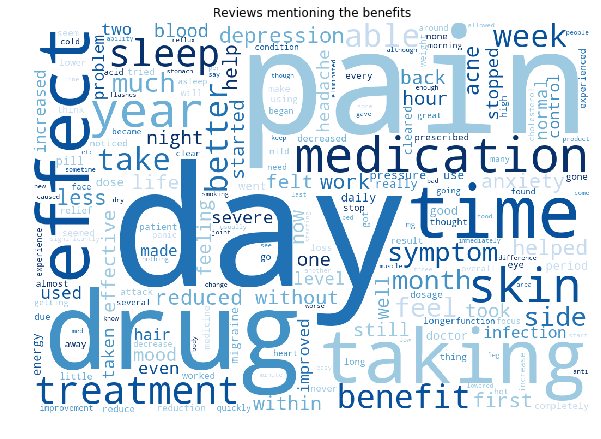

In [21]:
word_cloud(train_data['Review of benefits'], "Reviews mentioning the benefits", bluecolor)

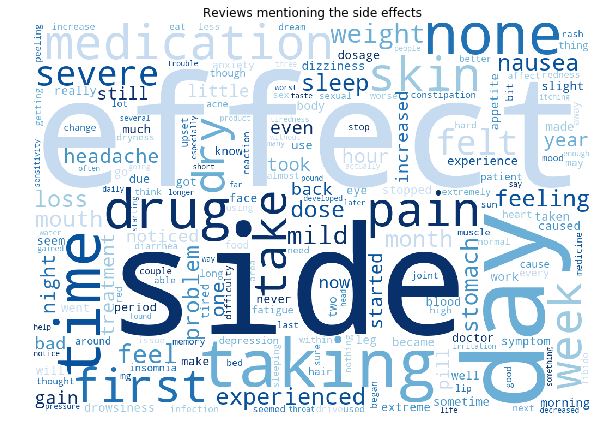

In [22]:
word_cloud(train_data['Review of side effects'], "Reviews mentioning the side effects", bluecolor)

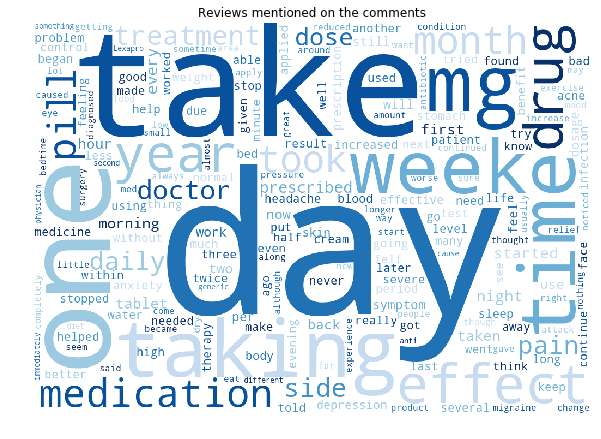

In [23]:
word_cloud(train_data['Review of comments'], "Reviews mentioned on the comments", bluecolor)

In [24]:
def parse_reviews(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    key_reviews.extend(l)

def parse_keywords(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)
    
def preferred_reviews(x):
    kwl = []
    train_data[train_data.effectiveness==x].benefitsReview.dropna().apply(parse_keywords, l=kwl)
    kwl = pd.Series(kwl)
    return kwl.value_counts()[:10]

In [25]:
key_reviews = []
train_data.effectiveness.dropna().apply(parse_reviews)
key_reviews = pd.Series(key_reviews)
key_reviews = key_reviews[key_reviews!='']
effects = key_reviews.value_counts().iloc[:25]

In [26]:
popular_effects = train_data.effectiveness.value_counts()
popular_effects

Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: effectiveness, dtype: int64

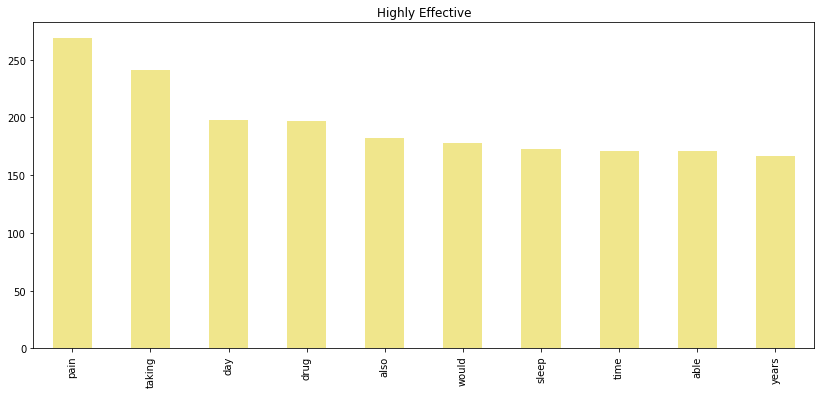

In [27]:
preferred_reviews(popular_effects.index[0]).plot(title='Highly Effective', kind='bar', color='khaki',figsize = (14,6))

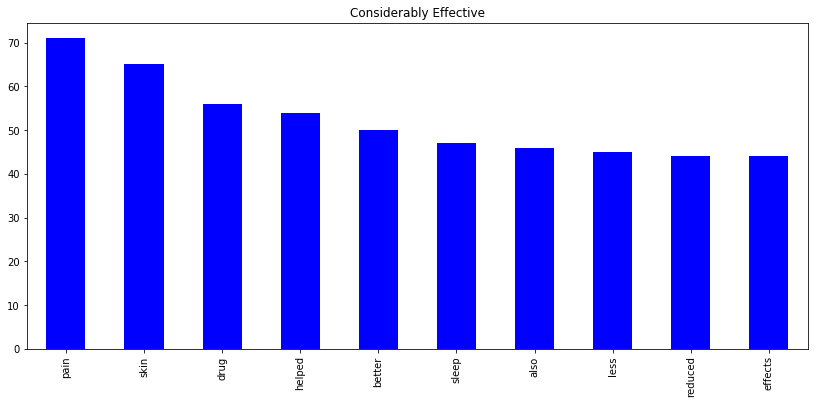

In [28]:
preferred_reviews(popular_effects.index[2]).plot(title='Considerably Effective', kind='bar', color='blue',figsize = (14,6))

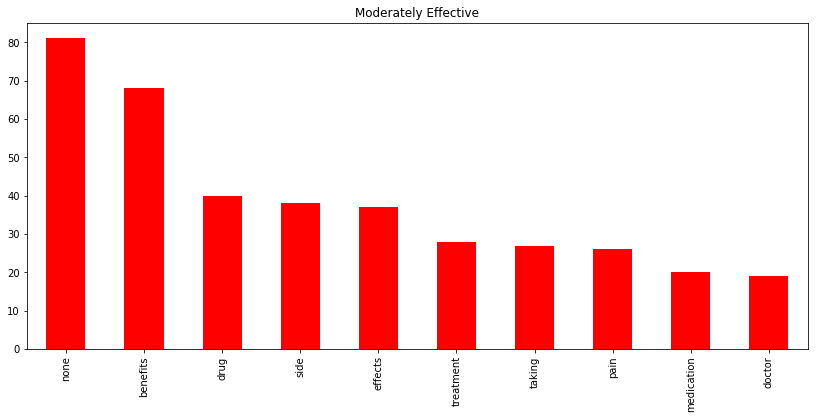

In [29]:
preferred_reviews(popular_effects.index[3]).plot(title='Moderately Effective', kind='bar', color='red',figsize = (14,6))

In [30]:
def parse_reviews(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    se_reviews.extend(l)

def parse_keywords(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)
    
def preferred_side_effects_reviews(x):
    kwl = []
    train_data[train_data.sideEffects==x].sideEffectsReview.dropna().apply(parse_keywords, l=kwl)
    kwl = pd.Series(kwl)
    return kwl.value_counts()[:10]

In [31]:
se_reviews = []
train_data.sideEffects.dropna().apply(parse_reviews)
se_reviews = pd.Series(se_reviews)
se_reviews = se_reviews[se_reviews!='']
side_effects = se_reviews.value_counts().iloc[:25]

In [32]:
popular_side_effects = train_data.sideEffects.value_counts()
popular_side_effects

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

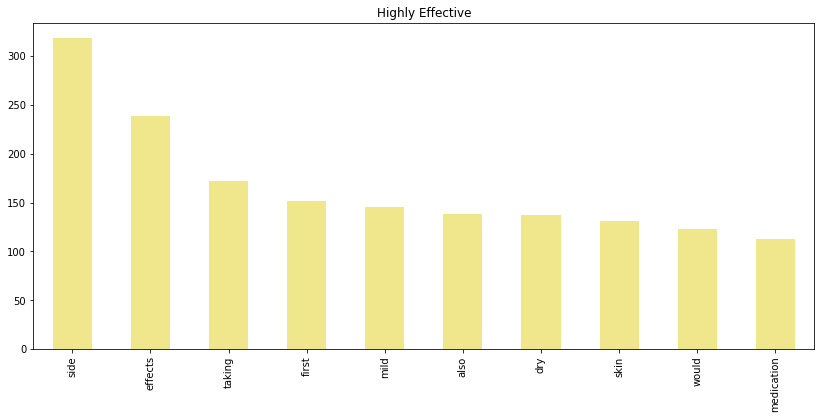

In [33]:
preferred_side_effects_reviews(popular_side_effects.index[0]).plot(title='Highly Effective', kind='bar', color='khaki',figsize = (14,6))

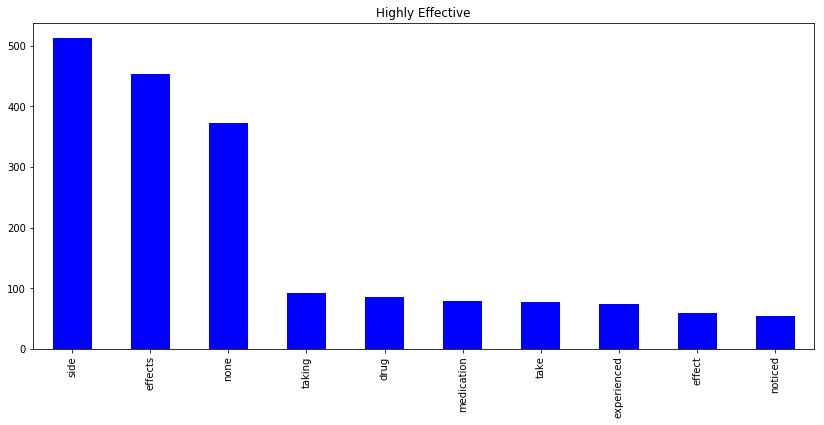

In [34]:
preferred_side_effects_reviews(popular_side_effects.index[1]).plot(title='Highly Effective', kind='bar', color='blue',figsize = (14,6))

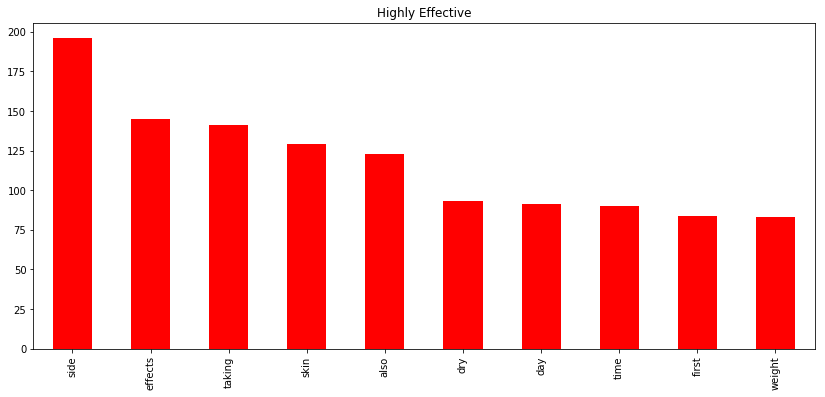

In [35]:
preferred_side_effects_reviews(popular_side_effects.index[2]).plot(title='Highly Effective', kind='bar', color='red',figsize = (14,6))